Confusion Matrix:
 [[ 52  11]
 [  5 103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.90      0.95      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



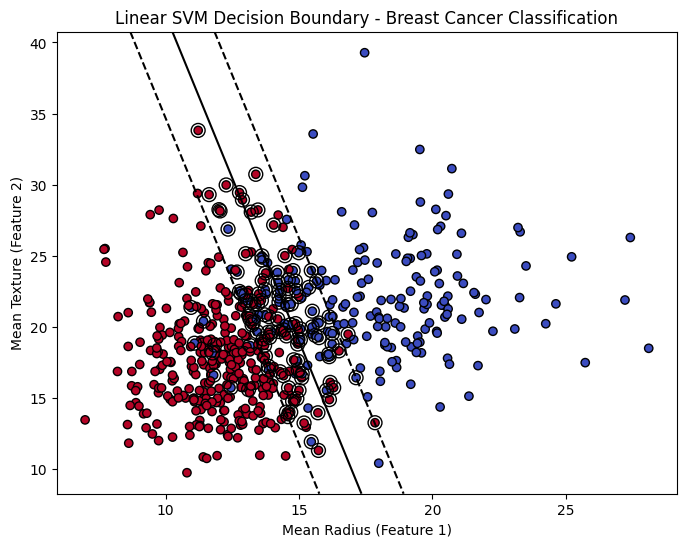

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]   # use first two features for easy 2D visualization (e.g., mean radius, mean texture)
y = cancer.target         # target: 0 = malignant, 1 = benign

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create and train a Linear SVM model
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to plot SVM decision boundary
def plot_svm(clf, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k')

    plt.xlabel("Mean Radius (Feature 1)")
    plt.ylabel("Mean Texture (Feature 2)")
    plt.title(title)
    plt.show()

# Visualize the decision boundary
plot_svm(svm_clf, X, y, "Linear SVM Decision Boundary - Breast Cancer Classification")
